In [1]:
# DEEP LEARNING_ANN_MODULE END PROJECT : PREDICTING CUSTOMER CHURN FOR A TELECOM COMPANY  

# The current challenge, is to develop a Deep learning based engine that predicts customers who are likely to churn.

In [2]:
# Importing Neccessary Libraries

import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, roc_curve, auc

import tensorflow as tf

from keras.regularizers import l2

from keras.models import Sequential # Sequential model is a linear stack of layers
from keras.layers import Dense, Dropout, BatchNormalization

from keras.utils import to_categorical
from keras import optimizers
from keras.callbacks import Callback
from keras import backend as K

import matplotlib.pyplot as plt
%matplotlib inline  

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

C:\Users\SAI VIVEK.K\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\SAI VIVEK.K\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\SAI VIVEK.K\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\SAI VIVEK.K\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:5

In [3]:
#fix random seed for reproducibility 
#Seed function is used to save the state of a random function, so that it can generate same random numbers on multiple executions of the code

np.random.seed(123)

tf.set_random_seed(123)   #tf.random.set_seed(123)

In [4]:
#Get current working directory

PATH = os.getcwd()

In [5]:
# Set the Working directory
 
os.chdir(PATH)

In [6]:
# Loading the data

Telcochurn = pd.read_csv("Telcochurn.csv",header=0)

In [7]:
# Exploratory Data Analysis and Preprocessing

# 1) Identification of Varibales and Datatypes



In [8]:
Telcochurn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
print(Telcochurn.shape)

(7043, 21)


In [10]:
#Display the columns

Telcochurn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
#Display the index
Telcochurn.index

RangeIndex(start=0, stop=7043, step=1)

In [12]:
Telcochurn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
# Summary Statistics and Distribution of the Columns
Telcochurn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
Telcochurn.describe(include = 'object' )

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,2,2,2,2,2,2,3,2,4,6531,2
top,7762-URZQH,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,4072,3096,5024,4614,4621,4999,4336,4311,3875,4171,2365,11,5174


In [15]:
# 2) Non - Graphical Univariate Analysis
#Distribution of dependent variable

Telcochurn.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [16]:
Telcochurn.Churn.value_counts(normalize = True)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [17]:
Telcochurn.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [18]:
Telcochurn[Telcochurn.Churn == 'Yes'].InternetService.value_counts(normalize = True)*100

Fiber optic    69.395399
DSL            24.558587
No              6.046014
Name: InternetService, dtype: float64

In [19]:
Telcochurn[Telcochurn.Churn == 'Yes'].Contract.value_counts(normalize = True)*100

Month-to-month    88.550027
One year           8.881755
Two year           2.568218
Name: Contract, dtype: float64

In [20]:
# People having Month-to-month Contract are about 88 % who are churning out.
 #Customer is impacted by the Monthly Charges you offer 


In [21]:
Telcochurn[Telcochurn.Churn == 'Yes'].PaymentMethod.value_counts(normalize = True)*100

Electronic check             57.303371
Mailed check                 16.479401
Bank transfer (automatic)    13.804173
Credit card (automatic)      12.413055
Name: PaymentMethod, dtype: float64

In [22]:
Telcochurn[Telcochurn.Churn == 'Yes'].tenure.value_counts(normalize = True)*100

1     20.331728
2      6.581059
3      5.029428
4      4.440877
5      3.424291
        ...    
45     0.321027
72     0.321027
62     0.267523
63     0.214018
64     0.214018
Name: tenure, Length: 72, dtype: float64

In [23]:
Telcochurn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [24]:
#Convert all the attributes to appropriate type- Data type conversion

In [25]:
Telcochurn['SeniorCitizen'] = Telcochurn['SeniorCitizen'].map({1:'yes', 0:'no'})

In [26]:
Telcochurn.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [27]:
Telcochurn.TotalCharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [28]:
Telcochurn.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [29]:
Telcochurn.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [30]:
# Convert pandas.Series from dtype object to float, and errors to nans/ invalid parsing will be set as na
pd.to_numeric(Telcochurn.TotalCharges, errors = 'coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [31]:
pd.to_numeric(Telcochurn.TotalCharges, errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [32]:
Telcochurn[pd.to_numeric(Telcochurn.TotalCharges, errors = 'coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,no,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,no,No,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,no,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,no,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,no,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,no,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,no,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,no,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,no,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,no,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [33]:
Telcochurn = Telcochurn[Telcochurn.TotalCharges != ' ']

In [34]:
pd.to_numeric(Telcochurn.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [35]:
Telcochurn['TotalCharges'] = pd.to_numeric(Telcochurn.TotalCharges)

In [36]:
Telcochurn.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [37]:
#Telcochurn[Telcochurn['TotalCharges'].isnull()] # Wherever the value is set to True it will return those rows # Drop These rows

In [38]:
Telcochurn.shape

(7032, 21)

In [39]:
Telcochurn.iloc[488]

customerID                8372-JUXUI
gender                          Male
SeniorCitizen                     no
Partner                           No
Dependents                       Yes
tenure                             1
PhoneService                     Yes
MultipleLines                    Yes
InternetService          Fiber optic
OnlineSecurity                    No
OnlineBackup                      No
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                 74.35
TotalCharges                   74.35
Churn                            Yes
Name: 489, dtype: object

In [40]:
Telcochurn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [41]:
Telcochurn.drop('customerID',axis = 1,inplace = True)

In [42]:
Telcochurn.reset_index()

,index,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Female,no,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,Male,no,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,Male,no,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,7039,Female,no,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,7040,Female,no,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,7041,Male,yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [43]:
#Telcochurn.dropna(inplace = True)

In [44]:
Telcochurn.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [45]:
Telcochurn.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [46]:
for column in Telcochurn:
        print(f'{column} : {Telcochurn[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : ['no' 'yes']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [47]:
for col in ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']:
    Telcochurn[col] = Telcochurn[col].astype('category')

In [48]:
Telcochurn.dtypes

gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

In [49]:
#Telcochurn['Churn'] = Telcochurn['Churn'].map({'Yes': 1,'No':0})

In [50]:
#Telcochurn['Churn'].value_counts()

In [51]:
# YOUR CODE HERE
#Telco_X_train = Telcochurn_new.drop(['Churn'], axis = 1)
#Telco_y_train = Telcochurn_new["Churn"]

In [52]:
#type(Telco_y_train)

In [53]:
cat_columns = list(Telcochurn.select_dtypes('category').columns)
num_columns = list(Telcochurn.columns.difference(cat_columns))

In [54]:
cat_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [55]:
num_columns

['MonthlyCharges', 'TotalCharges', 'tenure']

In [56]:
# Convert categorical columns in dummies. Using the 'pd.get_dummies' method.
Telcochurn_cat_dummy = pd.get_dummies(columns = cat_columns,
                                      data = Telcochurn[cat_columns],
                                      prefix = cat_columns,
                                      prefix_sep = "_",
                                      drop_first = True)

In [57]:
Telcochurn_cat_dummy.dtypes

gender_Male                              uint8
SeniorCitizen_yes                        uint8
Partner_Yes                              uint8
Dependents_Yes                           uint8
PhoneService_Yes                         uint8
MultipleLines_Yes                        uint8
InternetService_Fiber optic              uint8
InternetService_No                       uint8
OnlineSecurity_Yes                       uint8
OnlineBackup_Yes                         uint8
DeviceProtection_Yes                     uint8
TechSupport_Yes                          uint8
StreamingTV_Yes                          uint8
StreamingMovies_Yes                      uint8
Contract_One year                        uint8
Contract_Two year                        uint8
PaperlessBilling_Yes                     uint8
PaymentMethod_Credit card (automatic)    uint8
PaymentMethod_Electronic check           uint8
PaymentMethod_Mailed check               uint8
Churn_Yes                                uint8
dtype: object

In [58]:
Telcochurn_cat_dummy.head()

,gender_Male,SeniorCitizen_yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [59]:
Telcochurn_cat_dummy.shape

(7032, 21)

In [60]:
Telcochurn_cat_dummy.dtypes

gender_Male                              uint8
SeniorCitizen_yes                        uint8
Partner_Yes                              uint8
Dependents_Yes                           uint8
PhoneService_Yes                         uint8
MultipleLines_Yes                        uint8
InternetService_Fiber optic              uint8
InternetService_No                       uint8
OnlineSecurity_Yes                       uint8
OnlineBackup_Yes                         uint8
DeviceProtection_Yes                     uint8
TechSupport_Yes                          uint8
StreamingTV_Yes                          uint8
StreamingMovies_Yes                      uint8
Contract_One year                        uint8
Contract_Two year                        uint8
PaperlessBilling_Yes                     uint8
PaymentMethod_Credit card (automatic)    uint8
PaymentMethod_Electronic check           uint8
PaymentMethod_Mailed check               uint8
Churn_Yes                                uint8
dtype: object

In [61]:
# YOUR CODE HERE
# Impute numerical columns

# Apply label encoder to each column with categorical data
 #num_imputer = SimpleImputer()
#imputed_X_train = pd.DataFrame(num_imputer.fit_transform(X_train[numerical_columns]),
                              # columns = numerical_columns)
#imputed_X_test  = pd.DataFrame(num_imputer.transform(X_test[numerical_columns]),
                               #columns = numerical_columns)

In [62]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#Telcochurn_num = pd.DataFrame(scaler.fit_transform(Telcochurn[num_columns]),
                              #columns = num_columns)

In [63]:
#scale = StandardScaler()

In [64]:
#scale.fit(Telcochurn[num_columns])

In [65]:
#Telcochurn_std = pd.DataFrame(scale.transform(Telcochurn[num_columns]),
                              #columns = num_columns)

In [66]:
#Telcochurn_std.dtypes

In [67]:
Telcochurn_num = Telcochurn[num_columns]

In [68]:
Telcochurn_num.dtypes

MonthlyCharges    float64
TotalCharges      float64
tenure              int64
dtype: object

In [69]:
pd.concat([Telcochurn_num,Telcochurn_cat_dummy], axis=1)

,MonthlyCharges,TotalCharges,tenure,gender_Male,SeniorCitizen_yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,29.85,29.85,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,56.95,1889.50,34,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,53.85,108.15,2,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,42.30,1840.75,45,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,70.70,151.65,2,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,1990.50,24,1,0,1,1,1,1,0,...,1,1,1,1,0,1,0,0,1,0
7039,103.20,7362.90,72,0,0,1,1,1,1,1,...,0,1,1,1,0,1,1,0,0,0
7040,29.60,346.45,11,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
7041,74.40,306.60,4,1,1,1,0,1,1,1,...,0,0,0,0,0,1,0,0,1,1


In [70]:
Final_Telcochurn = pd.concat([Telcochurn_cat_dummy,Telcochurn_num], axis = 1)

In [71]:
Final_Telcochurn.shape

(7032, 24)

In [72]:
Final_Telcochurn.dtypes

gender_Male                                uint8
SeniorCitizen_yes                          uint8
Partner_Yes                                uint8
Dependents_Yes                             uint8
PhoneService_Yes                           uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_Yes                           uint8
DeviceProtection_Yes                       uint8
TechSupport_Yes                            uint8
StreamingTV_Yes                            uint8
StreamingMovies_Yes                        uint8
Contract_One year                          uint8
Contract_Two year                          uint8
PaperlessBilling_Yes                       uint8
PaymentMethod_Credit card (automatic)      uint8
PaymentMethod_Electronic check             uint8
PaymentMethod_Mailed check                 uint8
Churn_Yes           

In [73]:
Final_Telcochurn.isnull().sum().sum()

0

In [74]:
Final_Telcochurn.dropna(axis = 0)

,gender_Male,SeniorCitizen_yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,MonthlyCharges,TotalCharges,tenure
0,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,29.85,29.85,1
1,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,56.95,1889.50,34
2,1,0,0,0,1,0,0,0,1,1,...,0,0,1,0,0,1,1,53.85,108.15,2
3,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,42.30,1840.75,45
4,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,1,0,1,70.70,151.65,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,0,0,1,0,...,1,0,1,0,0,1,0,84.80,1990.50,24
7039,0,0,1,1,1,1,1,0,0,1,...,1,0,1,1,0,0,0,103.20,7362.90,72
7040,0,0,1,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,29.60,346.45,11
7041,1,1,1,0,1,1,1,0,0,0,...,0,0,1,0,0,1,1,74.40,306.60,4


In [75]:
Final_Telcochurn.isnull().sum().sum()

0

In [76]:
# Train and Validation Split & performing preprocessing appropriately on each of them

X, y = Final_Telcochurn.loc[:,Final_Telcochurn.columns!='Churn_Yes'].values, Final_Telcochurn.loc[:,'Churn_Yes'].values

X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=123)

In [77]:
print(X_train.shape)
print(X_valid.shape)

(4922, 23)
(2110, 23)


In [78]:
print(pd.value_counts(y_train))
print(pd.value_counts(y_valid))

0    3679
1    1243
dtype: int64
0    1484
1     626
dtype: int64


In [79]:
print(pd.value_counts(y_train)/y_train.size * 100)
print(pd.value_counts(y_valid)/y_valid.size * 100)

0    74.746038
1    25.253962
dtype: float64
0    70.331754
1    29.668246
dtype: float64


In [80]:
Final_Telcochurn.dtypes

gender_Male                                uint8
SeniorCitizen_yes                          uint8
Partner_Yes                                uint8
Dependents_Yes                             uint8
PhoneService_Yes                           uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_Yes                           uint8
DeviceProtection_Yes                       uint8
TechSupport_Yes                            uint8
StreamingTV_Yes                            uint8
StreamingMovies_Yes                        uint8
Contract_One year                          uint8
Contract_Two year                          uint8
PaperlessBilling_Yes                       uint8
PaymentMethod_Credit card (automatic)      uint8
PaymentMethod_Electronic check             uint8
PaymentMethod_Mailed check                 uint8
Churn_Yes           

In [81]:
scale = StandardScaler()
scale.fit(X_train)
X_train_std = scale.transform(X_train)
X_valid_std = scale.transform(X_valid)

In [82]:
np.random.seed(123)
tf.set_random_seed(123)

In [83]:
from keras import models
from keras import layers

In [84]:
Telco_NN = models.Sequential()
#
Telco_NN.add(layers.Dense(25, 
                            input_shape=(X_train_std.shape[1], ), 
                            activation='relu', 
                            kernel_initializer='glorot_normal'))
#
Telco_NN.add(layers.Dense(20, 
                            activation='relu', 
                            kernel_initializer='glorot_normal'))
#
Telco_NN.add(layers.Dense(1, 
                            activation='sigmoid', 
                            kernel_initializer='glorot_normal'))

In [85]:
%load_ext autoreload
%autoreload 2

In [86]:
from keras import optimizers


In [87]:
!pip install PyPi


In [88]:
!pip install helper

In [89]:
#from helper import accuracy_plot, loss_plot, compute_metrics

In [90]:
Telco_NN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                600       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 1,141
Trainable params: 1,141
Non-trainable params: 0
_________________________________________________________________


In [91]:
Telco_NN.compile(loss='binary_crossentropy', 
                   optimizer='adam', 
                   metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [92]:
%%time
Telco_NN_Model = Telco_NN.fit(X_train_std, 
                                        y_train, 
                                        epochs=100,
                                        batch_size= 32, 
                                        validation_split=0.2, 
                                        shuffle=True)


Train on 3937 samples, validate on 985 samples
Epoch 1/100
3937/3937 [==============================] - 3s 832us/step - loss: 0.4908 - accuracy: 0.7432 - val_loss: 0.4195 - val_accuracy: 0.8000
Epoch 2/100
3937/3937 [==============================] - 0s 31us/step - loss: 0.4439 - accuracy: 0.7760 - val_loss: 0.4076 - val_accuracy: 0.8213
Epoch 3/100
3937/3937 [==============================] - 0s 32us/step - loss: 0.4332 - accuracy: 0.7932 - val_loss: 0.4026 - val_accuracy: 0.8223
Epoch 4/100
3937/3937 [==============================] - 0s 30us/step - loss: 0.4255 - accuracy: 0.7963 - val_loss: 0.4020 - val_accuracy: 0.8234
Epoch 5/100
3937/3937 [==============================] - 0s 89us/step - loss: 0.4213 - accuracy: 0.7993 - val_loss: 0.4020 - val_accuracy: 0.8183
Epoch 6/100
3937/3937 [==============================] - 0s 48us/step - loss: 0.4169 - accuracy: 0.8037 - val_loss: 0.4018 - val_accuracy: 0.8183
Epoch 7/100
3937/3937 [==============================] - 0s 42us/step - los

3937/3937 [==============================] - 0s 38us/step - loss: 0.3392 - accuracy: 0.8433 - val_loss: 0.4304 - val_accuracy: 0.8183
Epoch 56/100
3937/3937 [==============================] - 0s 39us/step - loss: 0.3380 - accuracy: 0.8456 - val_loss: 0.4354 - val_accuracy: 0.8122
Epoch 57/100
3937/3937 [==============================] - 0s 44us/step - loss: 0.3348 - accuracy: 0.8446 - val_loss: 0.4341 - val_accuracy: 0.8193
Epoch 58/100
3937/3937 [==============================] - 0s 41us/step - loss: 0.3345 - accuracy: 0.8448 - val_loss: 0.4357 - val_accuracy: 0.8162
Epoch 59/100
3937/3937 [==============================] - 0s 41us/step - loss: 0.3327 - accuracy: 0.8491 - val_loss: 0.4352 - val_accuracy: 0.8132
Epoch 60/100
3937/3937 [==============================] - 0s 46us/step - loss: 0.3305 - accuracy: 0.8512 - val_loss: 0.4377 - val_accuracy: 0.8132
Epoch 61/100
3937/3937 [==============================] - 0s 32us/step - loss: 0.3296 - accuracy: 0.8501 - val_loss: 0.4392 - val_a

In [96]:
print(Telco_NN_Model.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


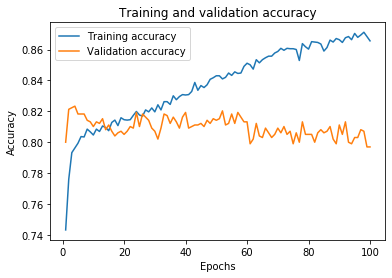

In [97]:
accuracy_plot(Telco_NN_Model)

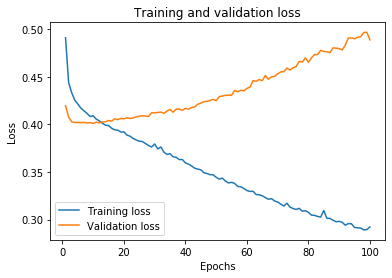

In [98]:
loss_plot(Telco_NN_Model)

In [99]:
Telco_NN_Model_Train__pred = Telco_NN.predict_classes(X_train_std)
                                               
Telco_NN_Model_Test_pred = Telco_NN.predict_classes(X_valid_std)

In [100]:
import helper

In [101]:
os.getcwd()

'C:\\Users\\SAI VIVEK.K\\Deep Learning_ANN_Module End Project'

In [102]:
#from helper.py import accuracy_plot, loss_plot, compute_metrics

In [103]:
#!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py 
#import helper

In [104]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Function to compute the metrics
def compute_metrics(train_pred, y_train, test_pred, y_test):
    # Confusion matrix for train predictions
    confmat = confusion_matrix(y_train, train_pred)
    
    print('Train metrics')
    print('Confusion matrix')
    print(confmat)
    print("----------------------------------------------")    
    TP = confmat[0,0]
    TN = confmat[1,1]
    FN = confmat[0,1]
    FP = confmat[1,0]
    Total = TP + TN + FP + FN

    # Accuracy: Overall, how often is the classifier correct?
    Accuracy = (TP+TN)/Total 
    # Misclassification Rate: Overall, how often is it wrong?
    # equivalent to 1 minus Accuracy also known as "Error Rate"
    Misclassification_Rate = (FP+FN)/Total

    # True Positive Rate: When it's actually yes, how often does it predict yes?
    # also known as "Sensitivity" or "Recall"
    Actual_Yes = TP + FN
    Recall = TP/Actual_Yes

    # False Positive Rate: When it's actually no, how often does it predict yes?
    Actual_No = TN + FP
    FPR = FP/Actual_No

    # True Negative Rate: When it's actually no, how often does it predict no?
    # equivalent to 1 minus False Positive Rate, also known as "Specificity"
    TNR = TN/Actual_No

    # Precision: When it predicts yes, how often is it correct?
    Predicted_Yes = TP + FP
    Precission = TP/Predicted_Yes

    # Prevalence: How often does the yes condition actually occur in our sample?
    Prevalance = Actual_Yes / Total
    
    # F1 Score
    f1 = 2 * (Precission * Recall) / (Precission + Recall)

    print('Accuracy: ', Accuracy)
    print('Precission: ', Precission)
    print('Recall: ', Recall)
    print('F1 Score: ', f1)
    print("")
    print("==============================================")
    print("")
    # Confusion matrix for train predictions
    confmat = confusion_matrix(y_test, test_pred)
    print('Test metrics')
    print('Confusion matrix')
    print(confmat)
    print("----------------------------------------------")  
    TP = confmat[0,0]
    TN = confmat[1,1]
    FN = confmat[0,1]
    FP = confmat[1,0]
    Total = TP + TN + FP + FN

    # Accuracy: Overall, how often is the classifier correct?
    Accuracy = (TP+TN)/Total 
    # Misclassification Rate: Overall, how often is it wrong?
    # equivalent to 1 minus Accuracy also known as "Error Rate"
    Misclassification_Rate = (FP+FN)/Total

    # True Positive Rate: When it's actually yes, how often does it predict yes?
    # also known as "Sensitivity" or "Recall"
    Actual_Yes = TP + FN
    Recall = TP/Actual_Yes

    # False Positive Rate: When it's actually no, how often does it predict yes?
    Actual_No = TN + FP
    FPR = FP/Actual_No

    # True Negative Rate: When it's actually no, how often does it predict no?
    # equivalent to 1 minus False Positive Rate, also known as "Specificity"
    TNR = TN/Actual_No

    # Precision: When it predicts yes, how often is it correct?
    Predicted_Yes = TP + FP
    Precission = TP/Predicted_Yes

    # Prevalence: How often does the yes condition actually occur in our sample?
    Prevalance = Actual_Yes / Total
    
    # F1 Score
    f1 = 2 * (Precission * Recall) / (Precission + Recall)

    print('Accuracy: ', Accuracy)
    print('Precission: ', Precission)
    print('Recall: ', Recall)
    print('F1 Score: ', f1)

# Function to draw plot for the train and validation accuracies
def accuracy_plot(history):
    plt.clf() # Clears the figure
    history_dict = history.history
    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']
    epochs = range(1, len(acc_values) + 1)
    plt.plot(epochs, acc_values, label='Training accuracy')
    plt.plot(epochs, val_acc_values, label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Function to draw plot for the train and validation loss 
def loss_plot(history):
    plt.clf() # Clears the figure
    history_dict = history.history
    acc_values = history_dict['loss']
    val_acc_values = history_dict['val_loss']
    epochs = range(1, len(acc_values) + 1)
    plt.plot(epochs, acc_values, label='Training loss')
    plt.plot(epochs, val_acc_values, label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [105]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
compute_metrics(Telco_NN_Model_Train__pred, y_train, Telco_NN_Model_Test_pred, y_valid)

Train metrics
Confusion matrix
[[3384  295]
 [ 387  856]]
----------------------------------------------
Accuracy:  0.8614384396586753
Precission:  0.8973747016706444
Recall:  0.9198151671649905
F1 Score:  0.9084563758389261


Test metrics
Confusion matrix
[[1283  201]
 [ 310  316]]
----------------------------------------------
Accuracy:  0.7578199052132701
Precission:  0.805398618957941
Recall:  0.8645552560646901
F1 Score:  0.8339291517712057


In [107]:
# Using auto encoders, get deep features for the same input, and using the deep features, build and tune to a good model
# and observe the performance

# Derive new non-linear features using autoencoder

In [108]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input

In [109]:
# The size of encoded and actual representations
encoding_dim = 16   # this is the size of our encoded representations
actual_dim = X_train_std.shape[1]

In [110]:
# Input placeholder
input_attrs = Input(shape=(actual_dim,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_attrs)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(actual_dim, activation='sigmoid')(encoded)

In [111]:
# this model maps an input to its reconstruction
autoencoder = Model(input_attrs, decoded)

In [112]:
print(autoencoder.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 23)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                384       
_________________________________________________________________
dense_5 (Dense)              (None, 23)                391       
Total params: 775
Trainable params: 775
Non-trainable params: 0
_________________________________________________________________
None


In [113]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [114]:
autoencoder.fit(X_train_std, X_train_std, epochs=100)

Epoch 1/100
4922/4922 [==============================] - 0s 72us/step - loss: 0.2664
Epoch 2/100
4922/4922 [==============================] - 0s 33us/step - loss: -1.2142
Epoch 3/100
4922/4922 [==============================] - 0s 39us/step - loss: -4.0949
Epoch 4/100
4922/4922 [==============================] - 0s 42us/step - loss: -8.9919
Epoch 5/100
4922/4922 [==============================] - 0s 40us/step - loss: -16.0820
Epoch 6/100
4922/4922 [==============================] - 0s 27us/step - loss: -25.2788
Epoch 7/100
4922/4922 [==============================] - 0s 29us/step - loss: -36.4336
Epoch 8/100
4922/4922 [==============================] - 0s 28us/step - loss: -49.4427
Epoch 9/100
4922/4922 [==============================] - 0s 26us/step - loss: -64.2007
Epoch 10/100
4922/4922 [==============================] - 0s 26us/step - loss: -80.6281
Epoch 11/100
4922/4922 [==============================] - 0s 33us/step - loss: -98.6514
Epoch 12/100
4922/4922 [======================

4922/4922 [==============================] - 0s 33us/step - loss: -5337.6905
Epoch 93/100
4922/4922 [==============================] - 0s 30us/step - loss: -5444.5021
Epoch 94/100
4922/4922 [==============================] - 0s 30us/step - loss: -5552.2918
Epoch 95/100
4922/4922 [==============================] - 0s 32us/step - loss: -5660.9952
Epoch 96/100
4922/4922 [==============================] - 0s 35us/step - loss: -5770.5862
Epoch 97/100
4922/4922 [==============================] - 0s 31us/step - loss: -5881.0802
Epoch 98/100
4922/4922 [==============================] - 0s 36us/step - loss: -5992.6318
Epoch 99/100
4922/4922 [==============================] - 0s 41us/step - loss: -6105.2550
Epoch 100/100
4922/4922 [==============================] - 0s 31us/step - loss: -6218.9026


In [115]:
# this model maps an input to its encoded representation
encoder = Model(input_attrs, encoded)

In [116]:
print(encoder.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 23)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                384       
Total params: 384
Trainable params: 384
Non-trainable params: 0
_________________________________________________________________
None


In [117]:
X_train_nonLinear_features = encoder.predict(X_train_std)
X_test_nonLinear_features = encoder.predict(X_valid_std)

In [118]:
X_train_nonLinear_features[1:2,:]

array([[ 94.29317 ,  64.10278 , 156.14288 ,   4.913437,  17.96573 ,
         80.43668 ,  75.44969 ,  64.715324,  67.87929 ,  68.11961 ,
        151.04576 ,   0.      ,  71.3187  ,  63.28002 ,  58.2437  ,
         84.67132 ]], dtype=float32)

In [119]:
encoder.get_weights()

[array([[-1.19722617e+00,  2.93928957e+00, -6.79592800e+00,
         -1.31224346e+01, -6.51033545e+00, -4.39799595e+00,
         -1.81740713e+00,  3.64856780e-01,  1.22368431e+00,
         -1.78191590e+00, -1.52110982e+00, -1.14243765e+01,
         -1.05291915e+00,  8.04008663e-01,  1.48304546e+00,
         -1.33817518e+00],
        [-4.27205712e-01, -1.67082348e+01,  8.53327274e+00,
         -6.83060169e+00, -1.67063770e+01, -1.55009928e+01,
         -1.45293217e+01, -1.67175331e+01, -1.57549982e+01,
         -1.54493780e+01,  9.09070683e+00,  9.75121975e+00,
         -1.59674997e+01, -1.62568607e+01, -1.64884014e+01,
         -1.22592649e+01],
        [-1.70019550e+01, -1.15899963e+01, -1.54425259e+01,
          1.22465792e+01,  7.92570257e+00, -1.52125988e+01,
         -1.52970076e+01, -1.15092840e+01, -1.37567816e+01,
         -1.38636265e+01, -1.63313122e+01, -2.68652248e+00,
         -1.45525694e+01, -1.30944767e+01, -1.13527174e+01,
         -1.58511152e+01],
        [-1.5278718

In [123]:
# Combining new non-linear features to X_train and X_test respectively

In [124]:
X_train = np.concatenate((X_train_std, X_train_nonLinear_features), axis=1)
X_test = np.concatenate((X_valid_std, X_test_nonLinear_features), axis=1)

In [125]:
#Perceptron Model Building with both actual and non-linear features

In [ ]:
#type(Telcochurn_num)

In [ ]:
#Telcochurn_num.head()

In [ ]:
#cat_attr_label = list(Telcochurn_new[['InternetService', 'Contract', 'PaymentMethod']])

In [ ]:
#cat_attr_label

In [ ]:
#cat_attr_onehot = list(Telcochurn_new[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']])

In [ ]:
#cat_attr_onehot 